In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data=pd.read_csv("../Celulares/celulares.csv")
df=pd.DataFrame(data)

In [277]:
df

,Rank,Manufacturer,Model,Form factor,Smartphone?,Year,Million Units
0,1.0,Nokia,1100,Bar,No,2003,250[4][1][5]
1,2.0,Nokia,1110,Bar,No,2005,247.5[4][1][6]
2,3.0,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224[7]
3,4.0,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200[8]
4,5.0,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1[9][10][11][12]
...,...,...,...,...,...,...,...
110,111.0,LG,G2,Touchscreen,Yes,2013,3[77][78]
111,112.0,LeTV,LeEco Le 1s,Touchscreen,Yes,2016,3[79][80]
112,113.0,Google,Pixel and Pixel XL,Touchscreen,Yes,2016,2.1[81]
113,114.0,Palm,Centro,Keyboard bar,Yes,2007,2[82]


Primer pregunta:
¿Cual fue la compañia que mas unidades vendio a lo largo de los años?

In [80]:
empresas=df[["Manufacturer","Million Units"]]
empresas

,Manufacturer,Million Units
0,Nokia,250[4][1][5]
1,Nokia,247.5[4][1][6]
2,Apple,224[7]
3,Nokia,200[8]
4,Apple,174.1[9][10][11][12]
...,...,...
110,LG,3[77][78]
111,LeTV,3[79][80]
112,Google,2.1[81]
113,Palm,2[82]


In [91]:
empresas1=empresas.iloc[0:23]
empresas1['Million Units'] = empresas1['Million Units'].str[:3]
empresas1

C:\Users\Tomás Navarro\AppData\Local\Temp\ipykernel_1192\3711668813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas1['Million Units'] = empresas1['Million Units'].str[:3]


,Manufacturer,Million Units
0,Nokia,250
1,Nokia,247
2,Apple,224
3,Nokia,200
4,Apple,174
5,Apple,164
6,Nokia,161
7,Apple,159
8,Apple,159
9,Apple,151


In [99]:
empresas2=empresas.iloc[23:109]
empresas2["Million Units"]=empresas2['Million Units'].str[:2]
empresas2

C:\Users\Tomás Navarro\AppData\Local\Temp\ipykernel_1192\383666419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas2["Million Units"]=empresas2['Million Units'].str[:2]


,Manufacturer,Million Units
23,Nokia,75
24,Samsung,70
25,Samsung,70
26,Nokia,65
27,Apple,63
...,...,...
104,LG,5[
105,Samsung,4.
106,Samsung,4.
107,Samsung,3.


In [140]:
empre=pd.merge(empresas1,empresas2, how="outer")
god_empre=empre.head(96)

In [141]:
god_empre["Million Units"]=god_empre["Million Units"].astype(int)

C:\Users\Tomás Navarro\AppData\Local\Temp\ipykernel_1192\2247126284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  god_empre["Million Units"]=god_empre["Million Units"].astype(int)


In [258]:
s_god=god_empre.groupby(['Manufacturer'])['Million Units'].apply(lambda x:x.sum())
ssj=s_god.nlargest(20).to_dict()
x=ssj.keys()
y=ssj.values()

{'Nokia': 2371,
 'Apple': 1662,
 'Samsung': 928,
 'Motorola': 323,
 'Huawei': 113,
 'Xiaomi': 85,
 'LG': 84,
 'Sony Ericsson': 45,
 'HTC': 16,
 'Research In Motion (RIM)': 15}

C:\Users\Tomás Navarro\AppData\Local\Temp\ipykernel_1192\3592264607.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


Text(0, 0.5, 'Millones de unidades')

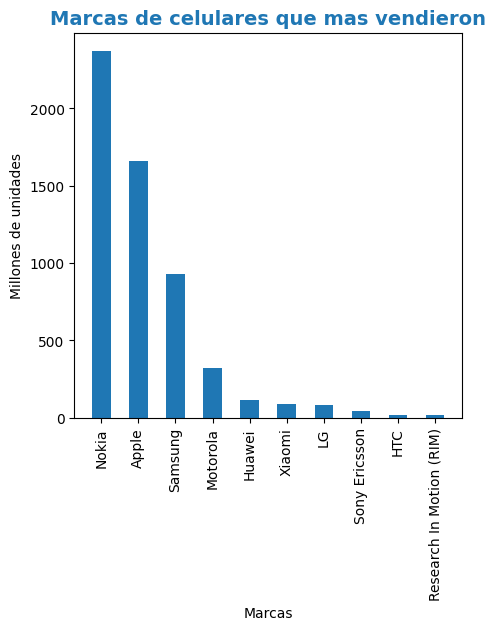

In [158]:
fig, ax = plt.subplots()
ax.bar(x, y,width = 0.5) 
ax.set_xticklabels(x, rotation=90)
fig.set_size_inches(5, 5)
ax.set_title('Marcas de celulares que mas vendieron', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_xlabel('Marcas')
ax.set_ylabel('Millones de unidades')

Como podemos ver en este estudio, la marca que mas ganancia tuvo en su historia SOLAMENTE POR VENTES DE PRODUCTOS fue Nokia, seguido por Apple y para completar el podio esta Samsung

¿Cual fue el mejor año para la industria telefonica?

In [234]:
df["Year"]=df["Year"].astype(int)

In [267]:
mejor_año=df[["Year"]]

In [269]:
diccionario=mejor_año.value_counts().head(6)
a=diccionario.to_dict()
x2=a.keys()
y2=a.values()

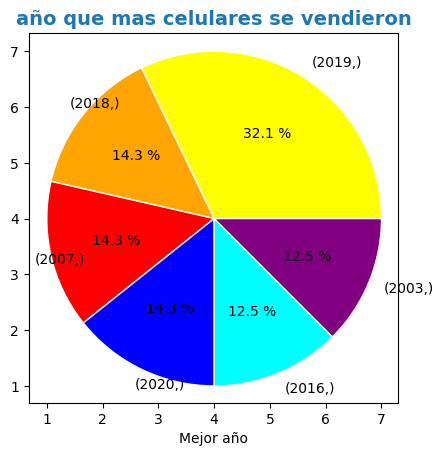

In [274]:
colors=["yellow","orange","red","blue","cyan","purple","black","gray","golden","brown"]
fig, ax = plt.subplots()
ax.pie(y2,labels=x2, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True, autopct="%0.1f %%")
ax.set_title('año que mas celulares se vendieron', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_xlabel('Mejor año')
plt.show()

El Año que mas celulares se vendieron fue en 2019 con el 32% de la mayoria de las ventas de celulares. Cabe destacar los años 2018,2007 y 2020 como grandes años para la industria tambien